In [35]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from neural_damped_oscillator import ODE_NN

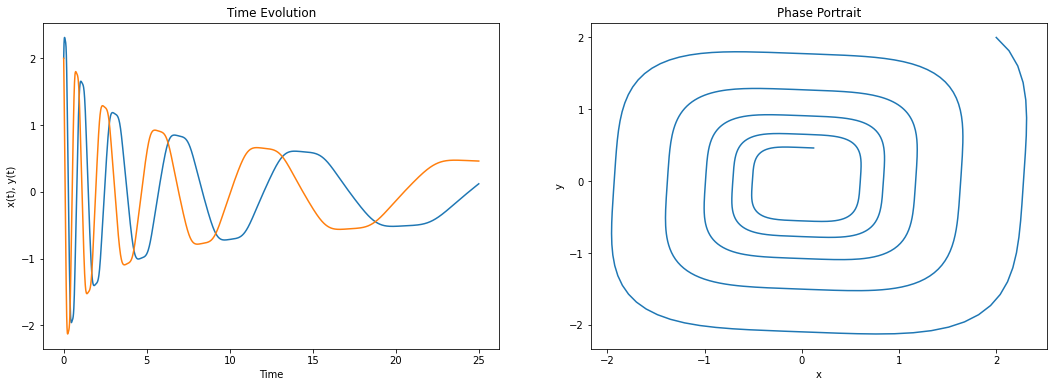

In [36]:
# set up the differential equation and get a reference solution (which is also the training data)

x0y0 = [2,2]
t = np.arange(0, 25, 0.01)

def f(y, t):
    return [-0.1*y[0]**3 + 2.0*y[1]**3, -2.0*y[0]**3 - 0.1*y[1]**3]

system = odeint(f, x0y0, t)

# plot the trajectories and the phase portraits

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t), y(t)')
axs[0].set_title('Time Evolution')
axs[1].plot(system[:,0], system[:,1])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Phase Portrait')
plt.show()

In [37]:
# Initialize the model and check the architecture

model = ODE_NN(0.01, system, 2, 'AM', num_neurons=32)

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=2, bias=True)
)


Epoch : 0, Loss : 6.812424182891846
Epoch : 200, Loss : 3.7451093196868896
Epoch : 400, Loss : 3.3258371353149414
Epoch : 600, Loss : 3.0956475734710693
Epoch : 800, Loss : 2.84094500541687
Epoch : 1000, Loss : 2.4825992584228516
Epoch : 1200, Loss : 2.0072872638702393
Epoch : 1400, Loss : 1.4591312408447266
Epoch : 1600, Loss : 0.9601145386695862
Epoch : 1800, Loss : 0.5824321508407593
Epoch : 2000, Loss : 0.34222352504730225
Epoch : 2200, Loss : 0.20789490640163422
Epoch : 2400, Loss : 0.1320405751466751
Epoch : 2600, Loss : 0.08748353272676468
Epoch : 2800, Loss : 0.06082456186413765
Epoch : 3000, Loss : 0.04449823498725891
Epoch : 3200, Loss : 0.034114591777324677
Epoch : 3400, Loss : 0.027177657932043076
Epoch : 3600, Loss : 0.022253530099987984
Epoch : 3800, Loss : 0.018624549731612206
Epoch : 4000, Loss : 0.01600070111453533
Epoch : 4200, Loss : 0.014088643714785576
Epoch : 4400, Loss : 0.012630232609808445
Epoch : 4600, Loss : 0.011509561911225319
Epoch : 4800, Loss : 0.0106240

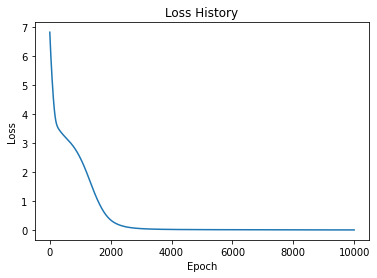

In [38]:
# Train the NN model using the data from the ODE solver and use it as the surrogate for the ODE

num_epochs = 10000
model.train(num_epochs)

def f_NN(y, t):
    f = model.model(torch.Tensor(y)).detach().numpy()
    return f

system_NN = odeint(f_NN, x0y0, t)

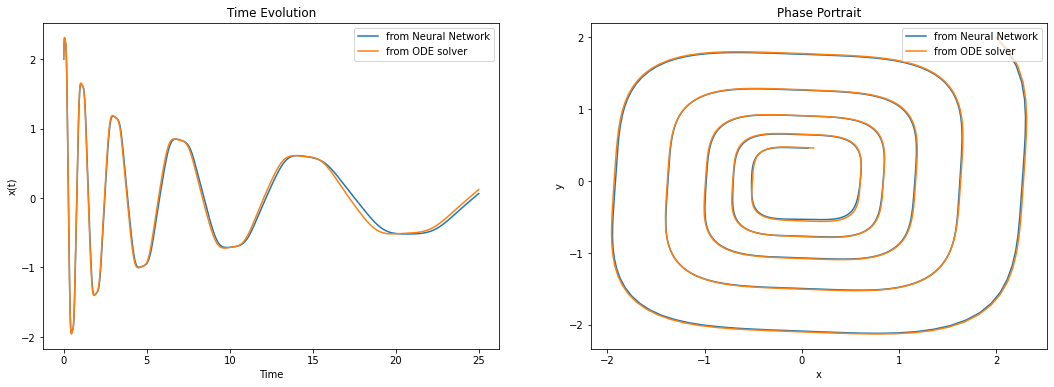

In [39]:
# plot the trajectories and the phase portraits

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system_NN[:,0], label='from Neural Network')
axs[0].plot(t, system[:,0], label='from ODE solver')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t)')
axs[0].legend()
axs[0].set_title('Time Evolution')
axs[1].plot(system_NN[:,0], system_NN[:,1], label='from Neural Network')
axs[1].plot(system[:,0], system[:,1], label='from ODE solver')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].set_title('Phase Portrait')
plt.show()

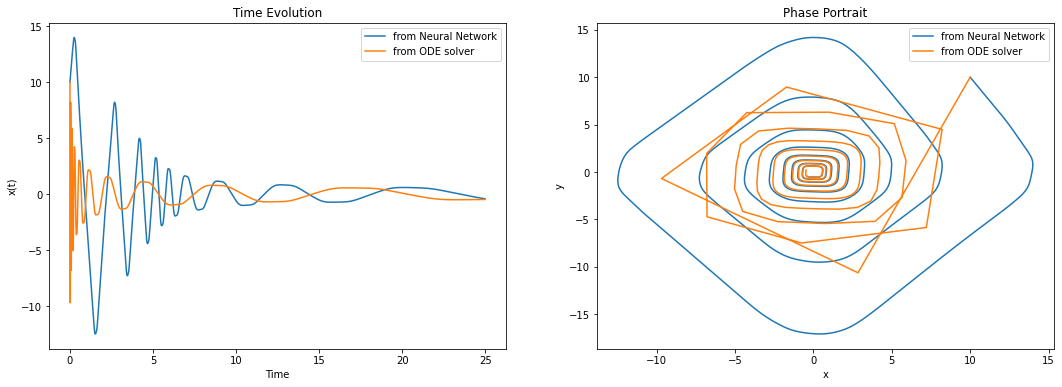

In [40]:
# Checking from another set of initial conditions: (x,y) = (10,10)

x0y0 = [10,10]
system = odeint(f, x0y0, t)
system_NN = odeint(f_NN, x0y0, t)

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system_NN[:,0], label='from Neural Network')
axs[0].plot(t, system[:,0], label='from ODE solver')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t)')
axs[0].legend()
axs[0].set_title('Time Evolution')
axs[1].plot(system_NN[:,0], system_NN[:,1], label='from Neural Network')
axs[1].plot(system[:,0], system[:,1], label='from ODE solver')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].set_title('Phase Portrait')
plt.show()

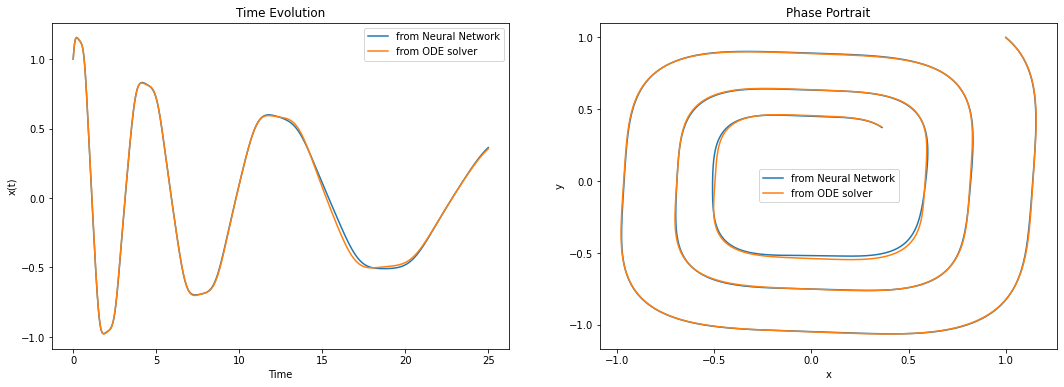

In [41]:
# Checking from another set of initial conditions: (x,y) = (1,1)

x0y0 = [1,1]
system = odeint(f, x0y0, t)
system_NN = odeint(f_NN, x0y0, t)

fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].plot(t, system_NN[:,0], label='from Neural Network')
axs[0].plot(t, system[:,0], label='from ODE solver')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('x(t)')
axs[0].legend()
axs[0].set_title('Time Evolution')
axs[1].plot(system_NN[:,0], system_NN[:,1], label='from Neural Network')
axs[1].plot(system[:,0], system[:,1], label='from ODE solver')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].set_title('Phase Portrait')
plt .savefig('comparison.png')
plt.show()